In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sop

In [11]:
def picard(f,x,atol=1e-6):
    fevals = 0
    x_prev = x + 2 * atol
    while abs(x-x_prev) > atol:
        x_prev = x 
        x = f(x_prev)
        fevals += 1
    print('\nPicard used' ,fevals, 'function evalutions')
    return x

def g(x):
    return np.exp(-x)
def f(x):
    return x - np.exp(-x)  


In [12]:
print('\nSolution from Picard =', picard(g,0.9,atol=1e-7))
print('Solution from Scipy = ', sop.newton(f,0.9))


Picard used 29 function evalutions

Solution from Picard = 0.5671432690088631
Solution from Scipy =  0.5671432904097843


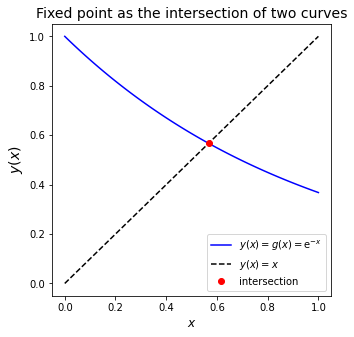

In [14]:
fig = plt.figure(figsize=(5,5))
ax1 = plt.subplot(111)
x = np.linspace(0,1,100)
ax1.plot(x,np.exp(-x),'b', label=r'$y(x)=g(x)=\mathrm{e}^{-x}$')
ax1.plot(x,x,'k--',label='$y(x)=x$')

ax1.plot(0.5671430835570621,0.5671430835570621,'ro',label='intersection')
ax1.legend(loc='best')
ax1.set_xlabel('$x$', fontsize=12)
ax1.set_ylabel('$y(x)$', fontsize=14)
ax1.set_title('Fixed point as the intersection of two curves', fontsize=14)
plt.show()

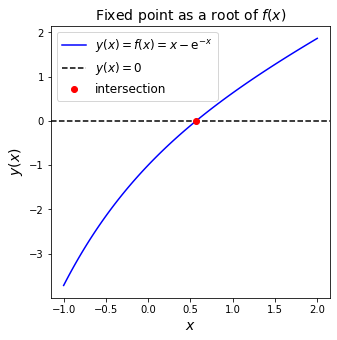

In [20]:
fig = plt.figure(figsize=(5,5))
ax1 = plt.subplot(111)

x = np.linspace(-1,2,100)

ax1.plot(x,x-np.exp(-x),'b',label='$y(x)=f(x)=x - \mathrm{e}^{-x}$')
xlim = ax1.get_xlim()
ax1.plot([xlim[0], xlim[1]], [0.,0.], 'k--', label='$y(x)=0$')
ax1.plot(0.5671, 0., 'ro', label='intersection')
ax1.set_xlim(xlim)
ax1.legend(loc='best',fontsize=12)
ax1.set_xlabel('$x$', fontsize=14)
ax1.set_ylabel('$y(x)$', fontsize=14)
ax1.set_title('Fixed point as a root of $f(x)$', fontsize=14)
plt.show()

In [21]:
def f(x):
    return 2*x + x*np.sin(x-3) - 5

def root_brackecting(f,a,b,dx):
    sign = np.sign(f(a))
    while sign == np.sign(f(a)):
        a += dx
        if a >= b:
            raise RuntimeError('no root within [a,b]')
    return (a-dx, a)

In [22]:
a = 0.
b = 5.
dx = 0.1
print('Bracket with a root =(%.3f,%.3f).' % root_brackecting(f,a,b,dx))

Bracket with a root =(2.700,2.800).


In [23]:
def f(x):
    return x - np.exp(-x)

a,b = -1., 1.
print('Root from Scipy bisection method =', sop.bisect(f,a,b))

Root from Scipy bisection method = 0.5671432904109679


$2x+xsin(x-3)=5$

In [30]:
def bisection(fct,a,b,atol=1e-6,nmax=100):
    n = 0
    while n <= nmax:
        c = (a+b)/2.
        if fct(c) == 0. or (b-a)/2. < atol:
            return c
        n += 1
        if np.sign(fct(c)) == np.sign(fct(a)):
            a = c
        else:
            b = c
    raise RuntimeError('no root found within [a,b]')
def f(x):
    return 2*x + x*np.sin(x-3) - 5
a , b =0. , 5.
print('ourcode=',bisection(f,a,b))
print('scipy code', sop.bisect(f,a,b))


ourcode= 2.790355086326599
scipy code 2.7903546180675676


In [31]:
def f(x):
    return x - np.exp(-x)
def dfdx(x):
    return 1 + np.exp(-x)
x0 = -1.
print('scipy code =',sop.newton(f,x0,dfdx))


scipy code = 0.567143290409784


$2x+xsin(x-3)=5$

In [34]:
def newton(f,x0,dfdx,atol=1e-6):
    x = [x0]
    fevals = 0
    while True:
        x.append(x[-1] - f(x[-1])/dfdx(x[-1]) )
        fevals += 2
        if abs(x[-1] - x[-2]) < atol:
            print('newton (analytical derivative) used',
                fevals, 'function evalutions')
            return x[-1]

def f(x):
    return 2*x - x*np.sin(3-x) -5
def dfdx(x):
    return 2 - np.sin(3-x) + x*np.cos(3-x)
x0 = 0.
print('our solutution =', newton(f,x0,dfdx))
print('SciPy solution =', sop.newton(f,x0,dfdx))

newton (analytical derivative) used 10 function evalutions
our solutution = 2.7903546180673837
SciPy solution = 2.7903546180673837


In [37]:
def quasi_newton(f, x0, dx=1e-7, atol=1e-6):
    x = [x0]
    while True:
        dfdx = (f(x[-1] + dx) - f(x[-1])) /dx
        x.append(x[-1] - f(x[-1])/dfdx)
        if abs(x[-1]-x[-2]) < atol:
            return x[-1]
def f(x):
    return 2 * x + x* np.sin(x-3) - 5

x0 = 0.0
print('our solution   =', quasi_newton(f,x0))
print('scipy solution =', sop.newton(f,x0))


our solution   = 2.7903546180673837
scipy solution = 2.7903546180673837


In [46]:
def secant(f,x0,x1,atol=1e-6):
    x = [x0,x1]
    while True:
        dfdx = (f(x[-1]) - f(x[-2])) / (x[-1] - x[-2])
        x.append(x[-1] - f(x[-1])/dfdx)
        if abs(x[-1]-x[-2]) < atol:
            return x[-1]
def f(x):
    return 2 * x + x*np.sin(x-3) -5

x0 = 0.0
x1 = x0 + 0.1
print('our solution   = ', secant(f,x0,x1))
print('SciPy solution = ', sop.newton(f,x0))

our solution   =  2.7903546180673446
SciPy solution =  2.7903546180673837


In [50]:
def f(x):
    return np.sin(np.pi*x) - np.exp(-x)
x0 = 0.0
print('solution for inital guess 0.0 =', sop.newton(f,x0))
x0 = 0.1
print('solution for inital guess 0.1 =', sop.newton(f,x0))

solution for inital guess 0.0 = 0.2747023164342058
solution for inital guess 0.1 = 0.2747023164342132
